# Short-time Fourier transform

> 个人理解就是周期性不强的信号，比如说人声，音乐，都是周期性不强的信号，所以可以用STFT来分析。


The STFT computes the Fourier transform of short overlapping windows of the input. This giving frequency components of the signal as they change over time. The interface of this function is modeled after (but not a drop-in replacement for) `librosa` stft function.

## load my `.wav` file

In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import soundfile as sf

torchaudio.set_audio_backend("soundfile") # pip install PySoundFile

# 读取音频文件
waveform, sample_rate = torchaudio.load('audio/demo.wav')

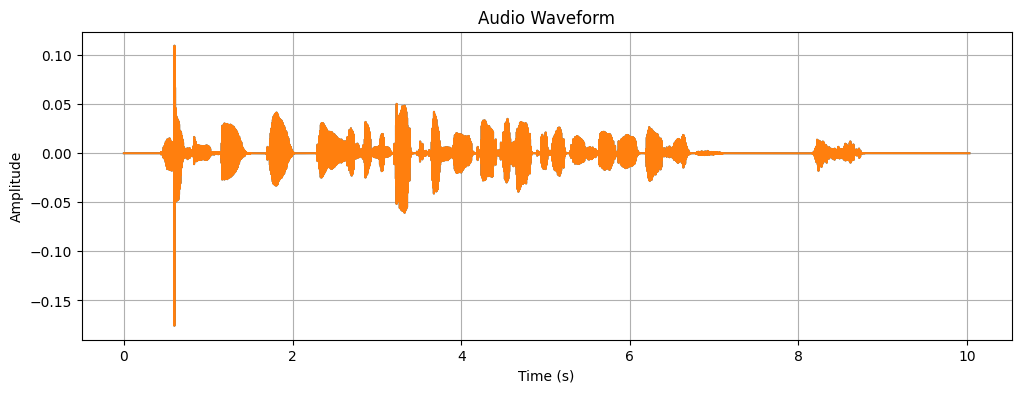

In [2]:
# 获取波形数据的时间轴
num_samples = waveform.shape[1]
time_axis = torch.arange(0, num_samples) / sample_rate

# 绘制波形图
plt.figure(figsize=(12, 4))
plt.plot(time_axis.numpy(), waveform.t().numpy())
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.grid()
plt.show()

In [3]:
type(waveform), waveform.shape, sample_rate # 这里说明我们的语音是双声道的

(torch.Tensor, torch.Size([2, 481280]), 48000)

## Hann window

In [4]:
# 定义STFT参数
n_fft = 400       # fft的特征点数
window = torch.hann_window(n_fft)  # 汉宁窗口函数

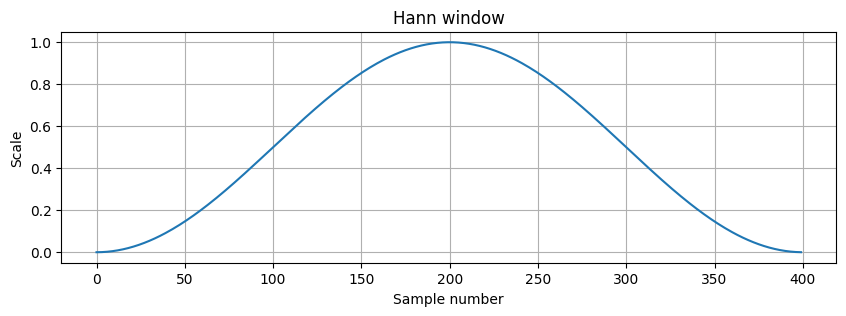

In [5]:
# plot the window
plt.figure(figsize=(10, 3))
plt.plot(window.numpy())
plt.xlabel('Sample number')
plt.ylabel('Scale')
plt.title('Hann window')
plt.grid()
plt.show()

## `torch.stft`

Ignoring the optional batch dimension, this method computes the following expression:

$$
 X[\omega, m] = \sum_{k = 0}^{\text{win\_length-1}}%
                            \text{window}[k]\ \text{input}[m \times \text{hop\_length} + k]\ %
                            \exp\left(- j \frac{2 \pi \cdot \omega k}{\text{win\_length}}\right)
$$

where $m$ is the index of the sliding window, and $\omega$ is the frequency $0\leq \omega< n_{fft}$  for `onesided=False` , or $0\leq\omega<\lfloor  n_{fft}/2 \rfloor + 1$ for `onesided=True` .


In [6]:
# 定义STFT参数
n_fft = 400       # fft的特征点数
hop_length = 160  # 帧之间的跳跃步长
win_length = 400  # 每一帧的长度
window = torch.hann_window(n_fft)  # 汉宁窗口函数


# 执行STFT变换
spectrogram = torch.stft(
    waveform, 
    n_fft=n_fft, 
    hop_length=hop_length, 
    win_length=win_length,
    window=window,
    return_complex=True
)


In [21]:
len(waveform[0])  / hop_length + 1

3009.0

In [22]:
n_fft/2 + 1

201.0

In [8]:
spectrogram.shape # (batch, D, T )

torch.Size([2, 201, 3009])

## spectrogram

In [9]:
# 将STFT结果转换为幅度谱
magnitude_spectrogram = torch.abs(spectrogram[0])

In [10]:
magnitude_spectrogram.shape # D, T

torch.Size([201, 3009])

In [28]:
magnitude_spectrogram.max(), magnitude_spectrogram.min()

(tensor(6.7471), tensor(0.))

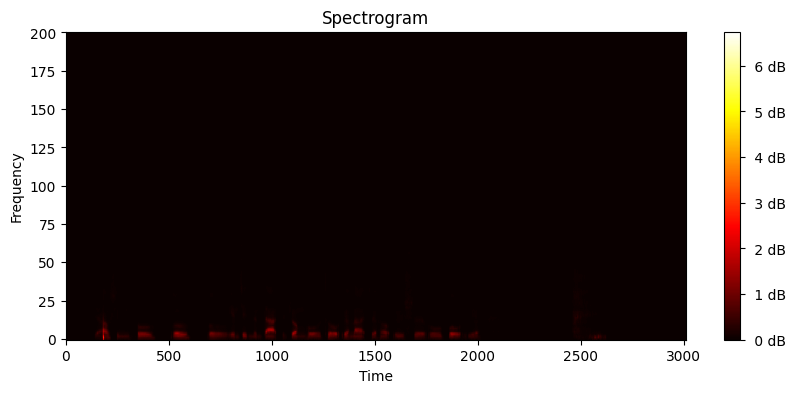

In [24]:
# 可视化幅度谱
plt.figure(figsize=(10, 4))
plt.imshow(
    magnitude_spectrogram.numpy(), 
    cmap='hot', 
    origin='lower', 
    aspect='auto'
)
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format='%2.0f dB') # amplitude
plt.show()


In [67]:
# 将幅度谱转换为分贝
log_spectrogram = 20 * torch.log10(magnitude_spectrogram)
log_spectrogram.shape

torch.Size([201, 3009])

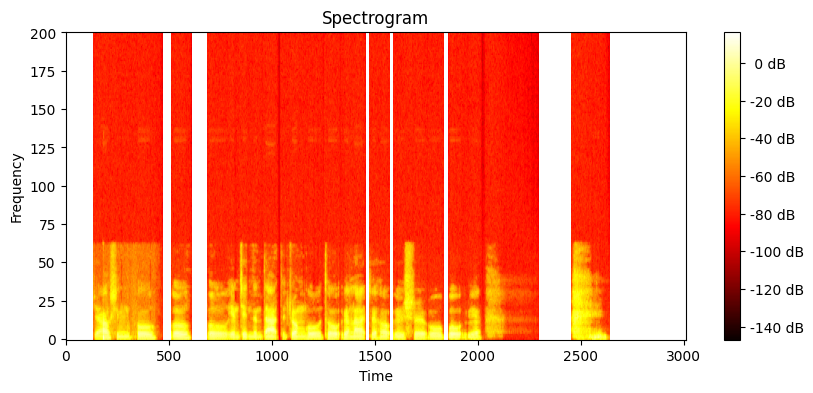

In [68]:
# 可视化幅度谱
plt.figure(figsize=(10, 4))
plt.imshow(
    log_spectrogram.numpy(), 
    cmap='hot', 
    origin='lower', 
    aspect='auto'
)
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format='%2.0f dB') # amplitude
plt.show()
